<a href="https://colab.research.google.com/github/bpolatCS/bpolatCS/blob/main/Data_Science_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [NEW YORK AIRBNB PRICES - GROUP 52]

Group Members:

Bengisu Özdemir

Oğuzhan Kaya

Sarp Bora Polat 



## Introduction

<font color="black">
The purpose of this project is to analyze the given NYC Airbnb data and establishing a connection between the main data set and our additional data sets. In terms of additional data sets, we are using NYC Subway data, NYC Bus Stop data, and NYC Point of Interests. By making these we are observing the connections between transportation opportunities and price points, whether a location's price increase/decrease depending on their distance to POI's. In order to do so, we visualized our data via bar graphs, word clouds, and tables.

</font>

### Utilized Datasets

We have used several datasets from Kaggle.

The main data is "New York City Airbnb Open Data" and it's link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

There are 3 more datasets we used throught the project as a side data for the main data.

Here additional 3 data set's links:

"A List of Important POIs"
https://data.cityofnewyork.us/Health/Places/mzbd-kucq

"Bus Stop Locations"
https://data.cityofnewyork.us/Transportation/Bus-Stop-Shelters/qafz-7myz

"Subway Locations"
https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49

In [ ]:
from google.colab import drive
drive.mount("./drive")
path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from os.path import join
from scipy.stats import f_oneway
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
filename_first_data = "AB_NYC_2019.csv"
df = pd.read_csv(join(path_prefix, filename_first_data))

In [ ]:
df.head()
#main

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
filename_second_data = "Areas_of_Interest_Centroids (1).csv"
dataframe2 = pd.read_csv(join(path_prefix, filename_second_data))

In [ ]:
dataframe2.head()
#POI

,the_geom,OBJECTID,Id,Name,Stacked,AnnoLine1,AnnoLine3,Borough,AnnoLine4,AnnoLine2a,Angle
0,POINT (-73.88895811640342 40.8962098695574),1,90,Van Cortlandt Park,3,Van,Park,Bronx,NaN,Cortlandt,0
1,POINT (-73.87165102682086 40.88987947152594),2,95,Woodlawn Cemetery,2,Woodlawn,NaN,Bronx,NaN,Cemetery,0
2,POINT (-73.8386418872537 40.88696522165708),3,81,Seton Falls Park,3,Seton,Park,Bronx,NaN,Falls,0
3,POINT (-73.80980242290379 40.87798554992497),4,69,Pelham Bay Park,3,Pelham,Park,Bronx,NaN,Bay,0
4,POINT (-73.87830775950145 40.864423947038276),5,8,Botanical Garden,2,Botanical,NaN,Bronx,NaN,Garden,0


In [ ]:
dataframe2.isna().sum()


the_geom       0
OBJECTID       0
Id             0
Name           0
Stacked        0
AnnoLine1      0
AnnoLine3     64
Borough        0
AnnoLine4     94
AnnoLine2a     4
Angle          0
dtype: int64

In [ ]:
filename_third_data = "Bus_Stop_Shelter.csv"
dataframe3 = pd.read_csv(join(path_prefix, filename_third_data))

In [ ]:
dataframe3.head()
#bus stop

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [ ]:
dataframe3.describe()


,CounDist,BoroCD,AssemDist,CongDist,StSenDist,LONGITUDE,LATITUDE,AssetID,BoroCode,SegmentID,PhysicalID,NODEID
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3.424000e+03,3428.000000,3.428000e+03
mean,24.651400,288.904026,55.430863,10.156651,22.673571,-73.919379,40.730147,1714.500000,2.806593,8.146843e+05,43019.437281,6.408690e+05
std,14.889481,124.796003,19.343640,3.361364,7.623886,0.086316,0.085123,989.722688,1.244864,2.408498e+06,40146.239776,2.293383e+06
min,1.000000,101.000000,23.000000,3.000000,10.000000,-74.239183,40.506049,1.000000,1.000000,1.148000e+03,0.000000,0.000000e+00
25%,11.000000,204.000000,37.000000,7.000000,16.000000,-73.968959,40.671005,857.750000,2.000000,4.040025e+04,11638.750000,0.000000e+00
50%,24.000000,308.000000,57.000000,10.000000,23.000000,-73.926177,40.731774,1714.500000,3.000000,8.591350e+04,37278.500000,0.000000e+00
75%,37.000000,406.000000,72.000000,13.000000,29.000000,-73.861331,40.794554,2571.250000,4.000000,1.589792e+05,59249.000000,2.348575e+04
max,51.000000,595.000000,87.000000,16.000000,36.000000,-73.712455,40.912781,3428.000000,5.000000,9.017040e+06,178096.000000,9.049294e+06


In [ ]:
filename_fourth_data = "DOITT_SUBWAY_STATION_01_13SEPT2010.csv"
dataframe4 = pd.read_csv(join(path_prefix, filename_fourth_data))

In [ ]:
dataframe4.head()
#subway

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


In [ ]:
dataframe4.tail()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
468,http://web.mta.info/nyct/service/,469,Coney Island - Stillwell Av,POINT (-73.9812359981396 40.57728100006751),D-F-N-Q,"D,F,N,Q-all times"
469,http://web.mta.info/nyct/service/,470,34th St - Hudson Yards,POINT (-74.00219709442206 40.75544635961596),7-7 Express,"7-all times, 7 Express-rush hours AM westbound..."
470,http://web.mta.info/nyct/service/,641,72nd St,POINT (-73.95836178682246 40.76880251014895),Q,Q-all times
471,http://web.mta.info/nyct/service/,642,86th St,POINT (-73.95177090964917 40.77786104333163),Q,Q-all times
472,http://web.mta.info/nyct/service/,643,96th St,POINT (-73.9470660219183 40.784236650177654),Q,Q-all times


In [ ]:
dataframe4.isna().sum()

URL         0
OBJECTID    0
NAME        0
the_geom    0
LINE        0
NOTES       0
dtype: int64

## Exploratory Data Analysis


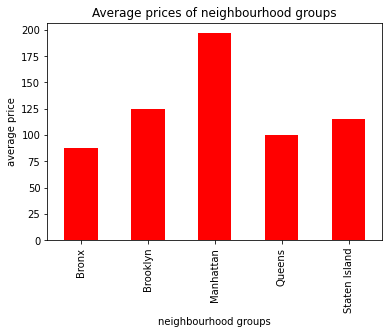

In [ ]:
##Here, using main data we extracted the price and neighbourhood group column. Then compared between.
#NegNames = list(df["neighbourhood_group"].unique())
#PriceList = []
#for i in NegNames:
#  PriceList.append( df[df["neighbourhood_group"] == i]["price"].mean())


ax = df.groupby(by="neighbourhood_group").mean()["price"].plot(kind="bar", color="red")

ax.set_xlabel('neighbourhood groups')
ax.set_ylabel('average price')
ax.set_title('Average prices of neighbourhood groups');



<font color = "brown">
<font size = 4px>
First of all we have started our exploaration with looking how average prices of lots vary by neighbourhood groups. As it is seen, most expensive neighbourhood group is Manhattan and the cheapest is Bronx.
</font>

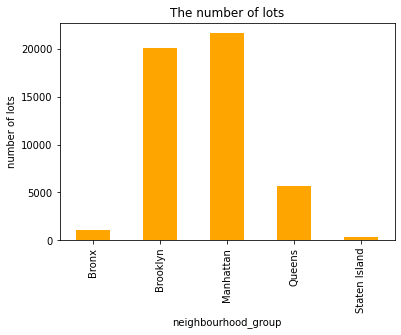

In [ ]:
ax=df.groupby(by="neighbourhood_group")["room_type"].count().plot(kind="bar", color="orange")

ax.set_xlabel('neighbourhood_group')
ax.set_ylabel('number of lots')
ax.set_title('The number of lots');



<font color = "brown">
<font size = 4px>
In this figure, it is seen that there are by far more lots than the Bronx in Manhattan. 
</font>

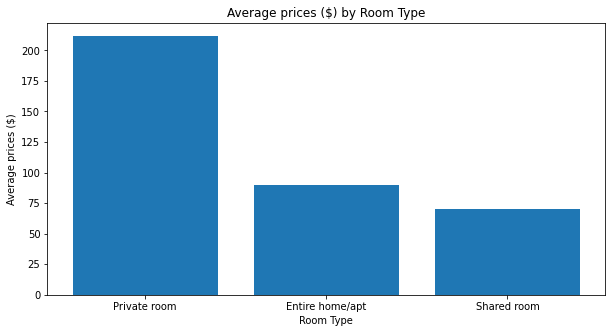

Average price by room type:
[211.79424613325986, 89.78097285675894, 70.12758620689655]


In [ ]:
data = list(df.groupby('room_type')['price'].mean()) # Average price by room type
plt.figure(figsize=(10,5))
plt.bar(df["room_type"].unique(), data)
plt.title("Average prices ($) by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average prices ($)")
plt.show()

#This is a list of average price by room type. 
print('Average price by room type:')
showLotPrice = list(df.groupby('room_type')['price'].mean()) # Average price by room type
print(showLotPrice)


<font color = "brown">
<font size = 4px>
In this figure, it is seen that there private room is the most expensive type of lot among entire home and shared room.
</font>

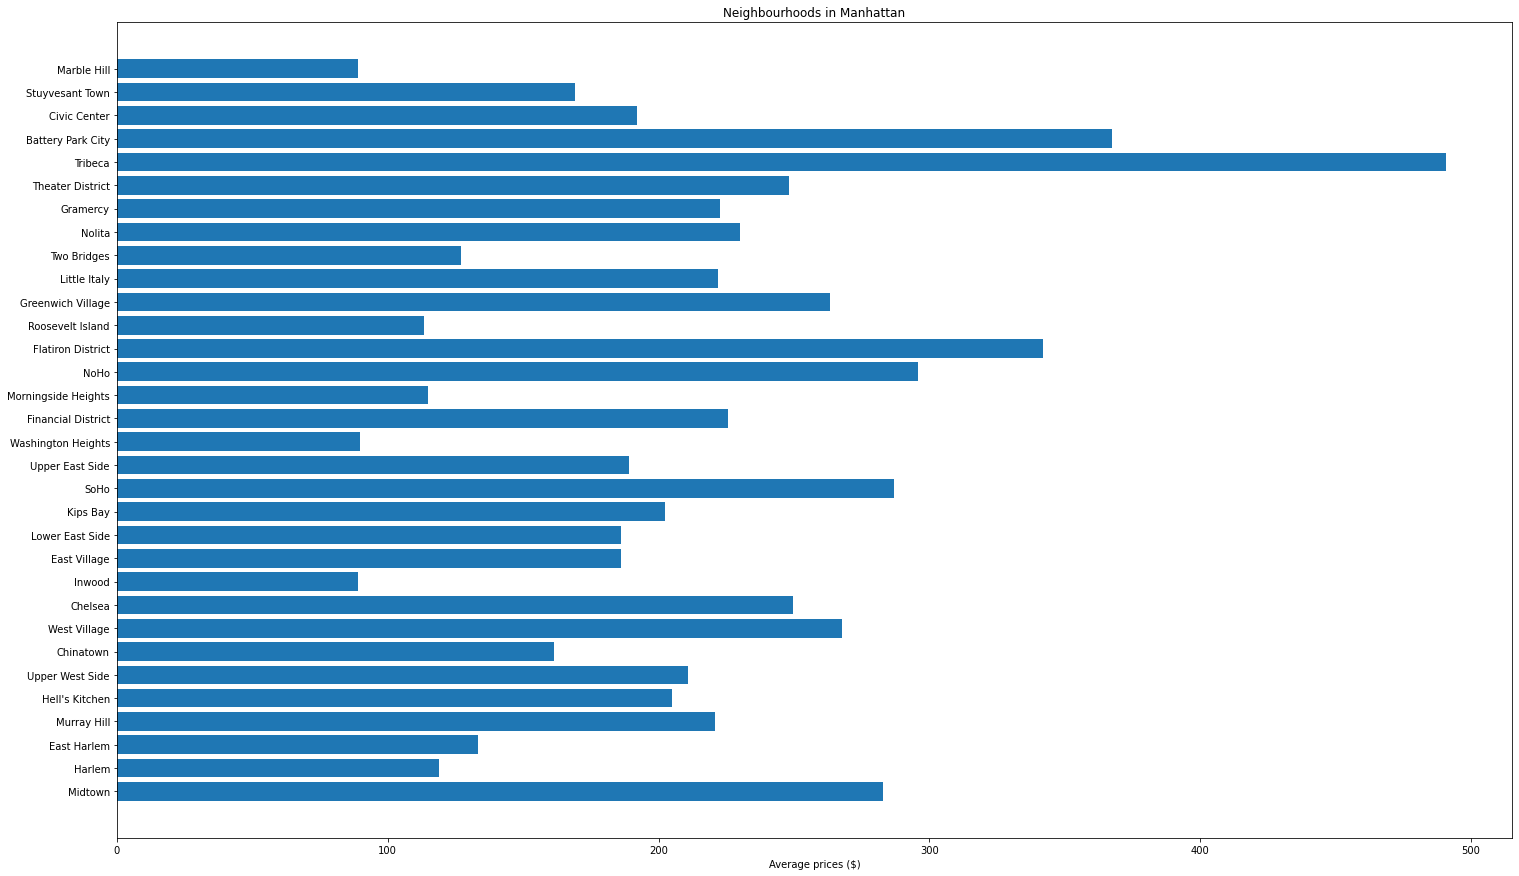

In [ ]:
ManhattanNeigh = list(df[df["neighbourhood_group"]== "Manhattan"]["neighbourhood"].unique())
neigNames=[]
neigPrc=[]
for j in ManhattanNeigh:
  neigNames.append(j)
  neigPrc.append(df[(df["neighbourhood_group"] == "Manhattan") & (df["neighbourhood"] == j)]["price"].mean())

plt.figure(figsize=(25,15))
plt.barh(neigNames, neigPrc)
plt.title("Neighbourhoods in Manhattan")
plt.xlabel("Average prices ($)")
plt.show()

<font color = "brown">
<font size = 4px>
Here, we looked Manhattan's neighbourhoods individually by average price. To do so, we got some insight about average prices.
</font>

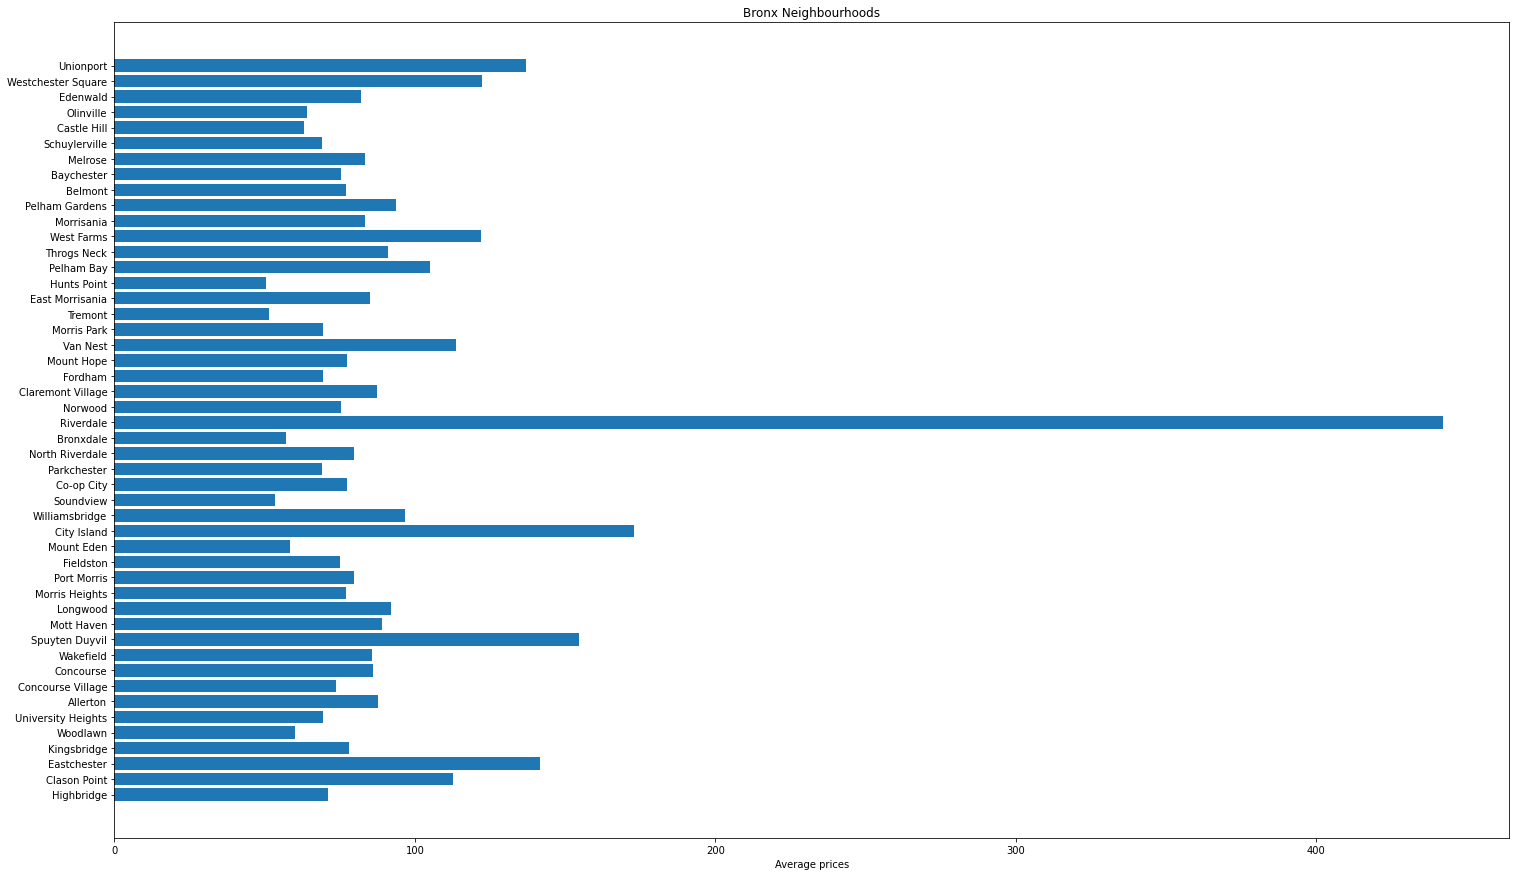

In [ ]:
BronxNeigh = list(df[df["neighbourhood_group"]== "Bronx"]["neighbourhood"].unique())
neigNamesQ=[]
neigPrcQ=[]
for j in BronxNeigh:
  neigNamesQ.append(j)
  neigPrcQ.append(df[(df["neighbourhood_group"] == "Bronx") & (df["neighbourhood"] == j)]["price"].mean())
plt.figure(figsize=(25,15))
plt.barh(neigNamesQ, neigPrcQ)
plt.title("Bronx Neighbourhoods")
plt.xlabel("Average prices")
plt.show()


<font color = "brown">
<font size = 4px>
We have done same thing for Bronx. We looked at the neighbourhoods average price. According to Bronx neighbourhoods graph, amoung the neighbourhoods Riverdale by far the most expensive neighbourhood in Bronx. This one should be analyze deeply later.
</font>

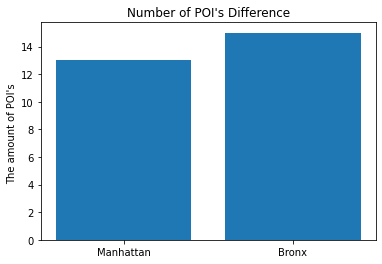

In [ ]:
numofPoiManhattan =0
numofPoiBronx = 0
for j in (dataframe2["Borough"]):
  if j == "Manhattan":
    numofPoiManhattan+= 1
  if j == "Bronx":
    numofPoiBronx+= 1

plt.bar( ['Manhattan','Bronx'], [numofPoiManhattan, numofPoiBronx])
plt.title("Number of POI's Difference")
plt.ylabel("The amount of POI's ")
plt.show()

<font color = "brown">
<font size = 4px>
After understood the most expensive and cheapest neighbourhood groups as Manhattan and Bronx, now we looked at the amount of the POIs effect neighbourhoods prices using our external source which is "Areas_of_Interest_Centroids.csv.'). 
</font>
<br>
<br>
<font color = "brown">
<font size = 4px>
It is seen that, Manhattan has 13 POIs and Bronx has 15. Although Manhattan is more expensive than Bronx, it is clearly seen that the amount of POIs has no affect on price differences.
</font>

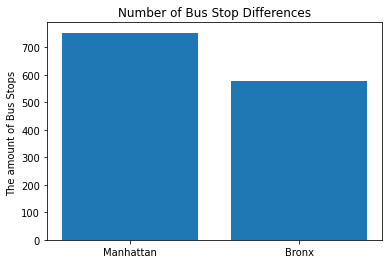

In [ ]:
numofSubwayManhattan =0
numofSubwayBronx = 0
for j in (dataframe3["BoroName"]):
  if j == "Manhattan":
    numofSubwayManhattan+= 1
  if j == "Bronx":
    numofSubwayBronx+= 1

plt.bar( ['Manhattan','Bronx'], [numofSubwayManhattan, numofSubwayBronx])
plt.title("Number of Bus Stop Differences")
plt.ylabel("The amount of Bus Stops ")
plt.show()

<font color = "brown">
<font size = 4px>
This time, we analyse number of bus stops in individual neighbourhoods and its affect on lot prices
</font>
<br>
<br>
<font color = "brown">
<font size = 4px>
It is seen that, Manhattan have over 700 Bus Stops and Bronx have approximately 500. ın this case, the quantity of bus stops might have an effect on high prices in Manhattan.
</font>

[13199, 7982, 480]
['Entire home/apt', 'Private room', 'Shared room']


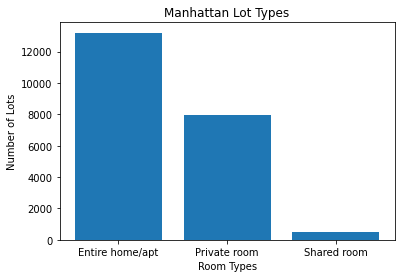

In [ ]:
lotCountM = list(df[(df["neighbourhood_group"] == "Manhattan")].groupby(["room_type"])["id"].count())
ManhattanRooms = list(df[df["neighbourhood_group"]== "Manhattan"]["room_type"].unique())

print(lotCountM)
print(ManhattanRooms)

plt.bar(ManhattanRooms, lotCountM)
plt.title("Manhattan Lot Types")
plt.xlabel("Room Types")
plt.ylabel("Number of Lots")
plt.show()

<font color = "brown">
<font size = 4px>
In this figure we are able to see how many hosts (lot) exist in different types in Manhattan
</font>


[379, 652, 60]
['Entire home/apt', 'Private room', 'Shared room']


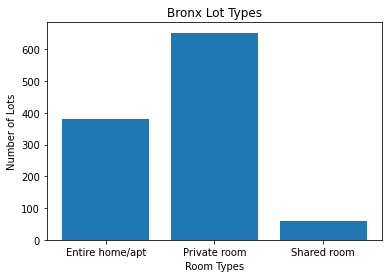

In [ ]:
lotCountB = list(df[(df["neighbourhood_group"] == "Bronx")].groupby(["room_type"])["id"].count())
BronxRooms = list(df[df["neighbourhood_group"]== "Bronx"]["room_type"].unique())

print(lotCountB)
print(ManhattanRooms)

plt.bar(['Entire home/apt', 'Private room', 'Shared room'], [379, 652, 60])
plt.title("Bronx Lot Types")
plt.xlabel("Room Types")
plt.ylabel("Number of Lots")
plt.show()

<font color = "brown">
<font size = 4px>
In this figure we are able to see how many hosts (lot) exist in different types in Bronx
</font>

[249.23910902341086, 116.7766224004009, 88.97708333333334]
['Entire home/apt', 'Private room', 'Shared room']


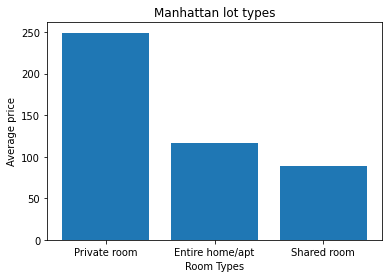

In [ ]:
aveLotPriceM = list(df[(df["neighbourhood_group"] == "Manhattan")].groupby(["room_type"])["price"].mean())
BronxRooms = list(df[df["neighbourhood_group"]== "Manhattan"]["room_type"].unique())

print(aveLotPriceM)
print(BronxRooms)

plt.bar(['Private room', 'Entire home/apt', 'Shared room'], aveLotPriceM)
plt.title("Manhattan lot types")
plt.xlabel("Room Types")
plt.ylabel("Average price")
plt.show()

<font color = "brown">
<font size = 4px>
In this figure we are able to see average prices in different lot types in Manhattan.
</font>

[127.5065963060686, 66.78834355828221, 59.8]
['Private room', 'Entire home/apt', 'Shared room']


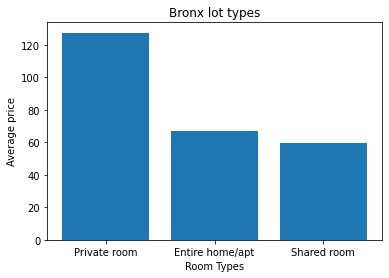

In [ ]:
aveLotPriceB = list(df[(df["neighbourhood_group"] == "Bronx")].groupby(["room_type"])["price"].mean())
BronxRooms = list(df[df["neighbourhood_group"]== "Bronx"]["room_type"].unique())

print(aveLotPriceB)
print(BronxRooms)

plt.bar(BronxRooms, aveLotPriceB)
plt.title("Bronx lot types")
plt.xlabel("Room Types")
plt.ylabel("Average price")
plt.show()



---


<font color = "brown">
<font size = 4px>
In this figure we are able to see average prices in different lot types in Bronx.
</font>


---



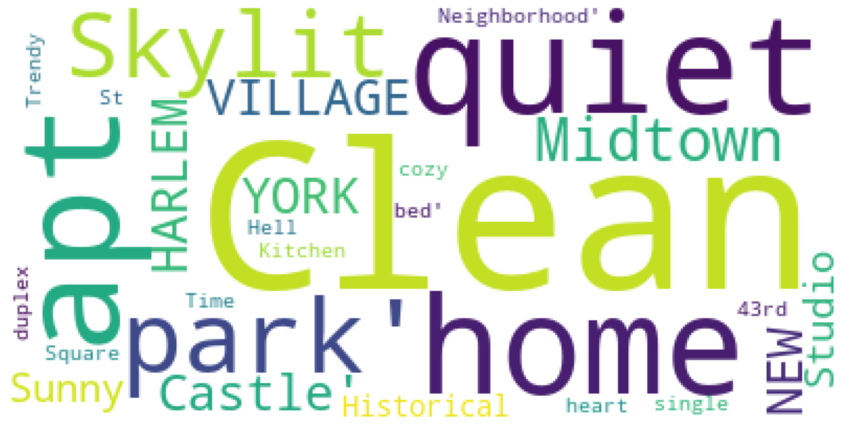

In [ ]:
cloud = WordCloud(background_color = "white", max_words = 200)
wordcloud = cloud.generate(str(df['name'].values))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<font color = "brown">
<font size = 4px>
These words are most commonly used in the titles of the lots in our main data.
</font>



---


## Future Work

<font color="blue">
We have seen that Riverdale is by far the most expensive neighbourhood. We thought there might be some unusal condition for Riverdale In future works, we can analyze the data in detail.

Our subway data will be used in the future when we dive deeply.

---


</font>

In [ ]:
#Manhattan's top 5 neighbourhoods
df[df["neighbourhood_group"] == "Manhattan"][["price","neighbourhood"]].sort_values(by="price", ascending=False).head()

,price,neighbourhood
29238,10000,Upper West Side
12342,9999,Lower East Side
40433,9999,Lower East Side
6530,9999,East Harlem
30268,8500,Tribeca


In [ ]:
#Bronx's top 5 neighbourhoods
df[df["neighbourhood_group"] == "Bronx"][["price","neighbourhood"]].sort_values(by="price", ascending=False).head()

,price,neighbourhood
24477,2500,Riverdale
48282,1000,City Island
25422,800,Riverdale
8521,680,Longwood
38433,670,Westchester Square



---


#Hypothesis Testing


---

### Sample Hypothesis Test 1 

**Hypothesis Test:**
We want to test whether there is significant differences in terms of number of reviews for different neighborhood.


**Null Hypothesis ($H_0$)**: Means of number of reviews for all different neighborhood are same (e.g.  $rewMan$  denotes Manhattan neighborhood)

$ H_0: \mu_{rewBrx} = \mu_{rewMan} = \mu_{rewSta} = \mu_{rewByn} = \mu_{rewQue}$

**Alternative Hypothesis ($H_A$)**: Means of number of reviews for all target values are not same 

$H_A$: means $\mu_{rewBrx}, \mu_{rewMan}, \mu_{rewSta}, \mu_{rewByn},\mu_{rewQue}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


In [ ]:
sample_Brooklyn,sample_Manhattan,sample_Queens,sample_StatenIsland,sample_Bronx = [df[df['neighbourhood_group'] == i] for i in df.neighbourhood_group.unique()]


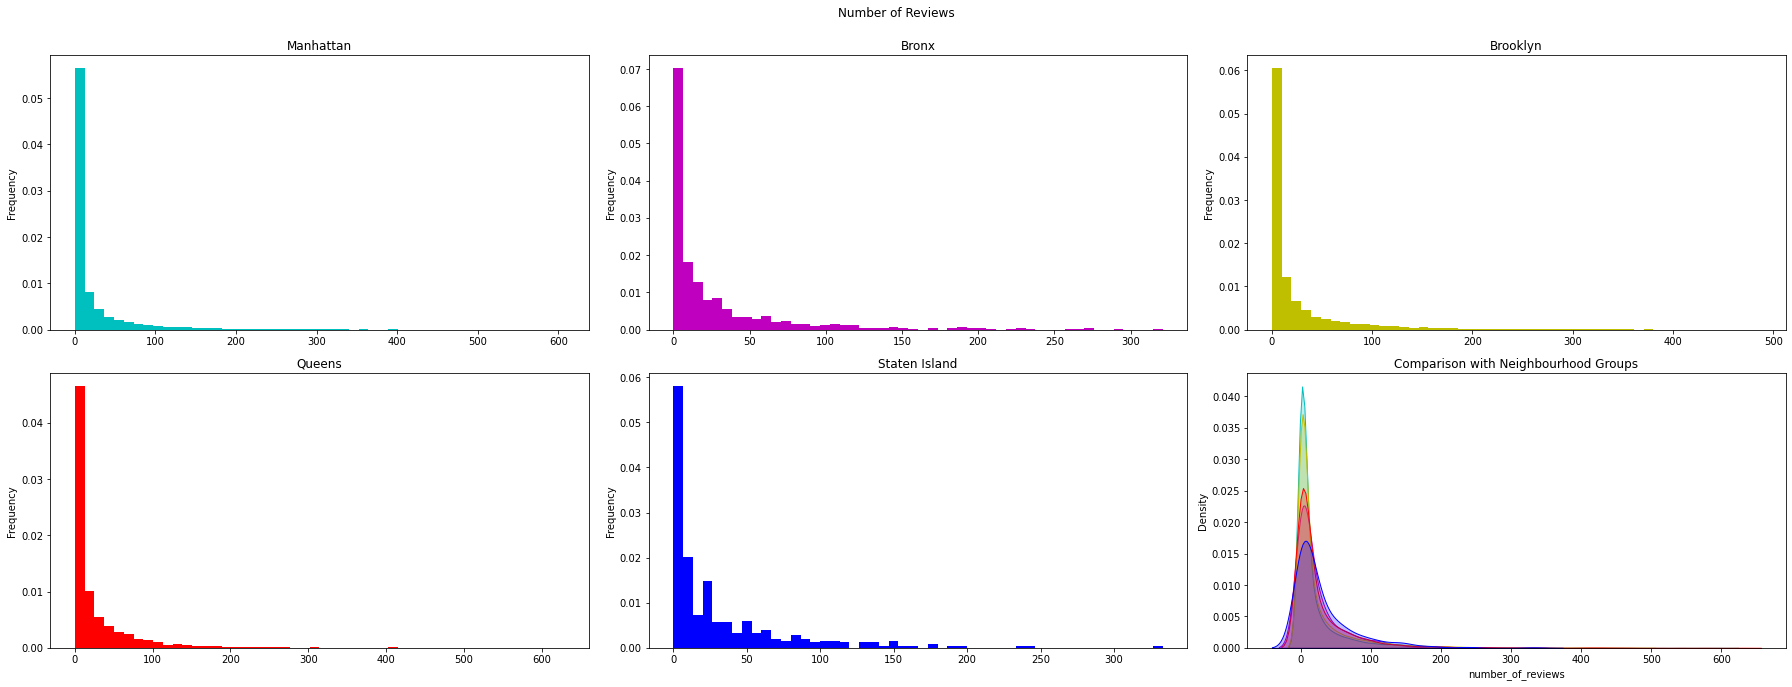

In [ ]:

fig, ax = plt.subplots(2, 3, figsize=(25,10)) 
        
sample_Manhattan['number_of_reviews'].plot(kind="hist", ax=ax[0][0], bins=50, label="none", color="c", density=True)
ax[0][0].set_title("Manhattan")

sample_Bronx['number_of_reviews'].plot(kind="hist", ax=ax[0][1], bins=50, label="none", color="m", density=True)
ax[0][1].set_title("Bronx")

sample_Brooklyn['number_of_reviews'].plot(kind="hist", ax=ax[0][2], bins=50, label="none", color="y", density=True)
ax[0][2].set_title("Brooklyn")

sample_Queens['number_of_reviews'].plot(kind="hist", ax=ax[1][0], bins=50, label="none", color="r", density=True)
ax[1][0].set_title("Queens")

sample_StatenIsland['number_of_reviews'].plot(kind="hist", ax=ax[1][1], bins=50, label="none", color="b", density=True)
ax[1][1].set_title("Staten Island")

sns.kdeplot(sample_Manhattan['number_of_reviews'], shade=True, label="Manhattan", ax=ax[1][2], color="c")
sns.kdeplot(sample_Bronx['number_of_reviews'], shade=True, label="Bronx", ax=ax[1][2], color="m")
sns.kdeplot(sample_Brooklyn['number_of_reviews'], shade=True, label="Brooklyn", ax=ax[1][2], color="y")
sns.kdeplot(sample_Queens['number_of_reviews'], shade=True, label="Queens", ax=ax[1][2], color="r")
sns.kdeplot(sample_StatenIsland['number_of_reviews'], shade=True, label="Staten Island", ax=ax[1][2], color="b")
ax[1][2].set_title("Comparison with Neighbourhood Groups")

plt.suptitle("Number of Reviews")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
f_stats, p_values = f_oneway(sample_Manhattan['number_of_reviews'].values, sample_Bronx['number_of_reviews'].values, sample_Brooklyn['number_of_reviews'].values, sample_Queens['number_of_reviews'].values, sample_StatenIsland['number_of_reviews'].values)
p_values


1.1485274809134217e-28

**Interpretation of result:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of number of reviews are not the same for all 5 neighborhoods. **Here, we reject the null hypothesis.**


### Sample Hypothesis Test 2 
**Hypothesis Test:**
We want to test whether there is a  significant difference in terms of average prices for different lot types.


**Null Hypothesis ($H_0$)**: average prices for all lot types are same (e.g.  $lotP$  denotes Private House lot type)

$ H_0: \mu_{lotP} = \mu_{lotE} = \mu_{lotS}$

**Alternative Hypothesis ($H_A$)**: average prices for all lot types are not same (e.g.  $lotP$  denotes Private House lot type)

$ H_A$: means of $\mu_{lotP}, \mu_{lotE}, \mu_{lotS}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


In [ ]:
priv,ent,sha = [df[df['room_type'] == i] for i in df.room_type.unique()]

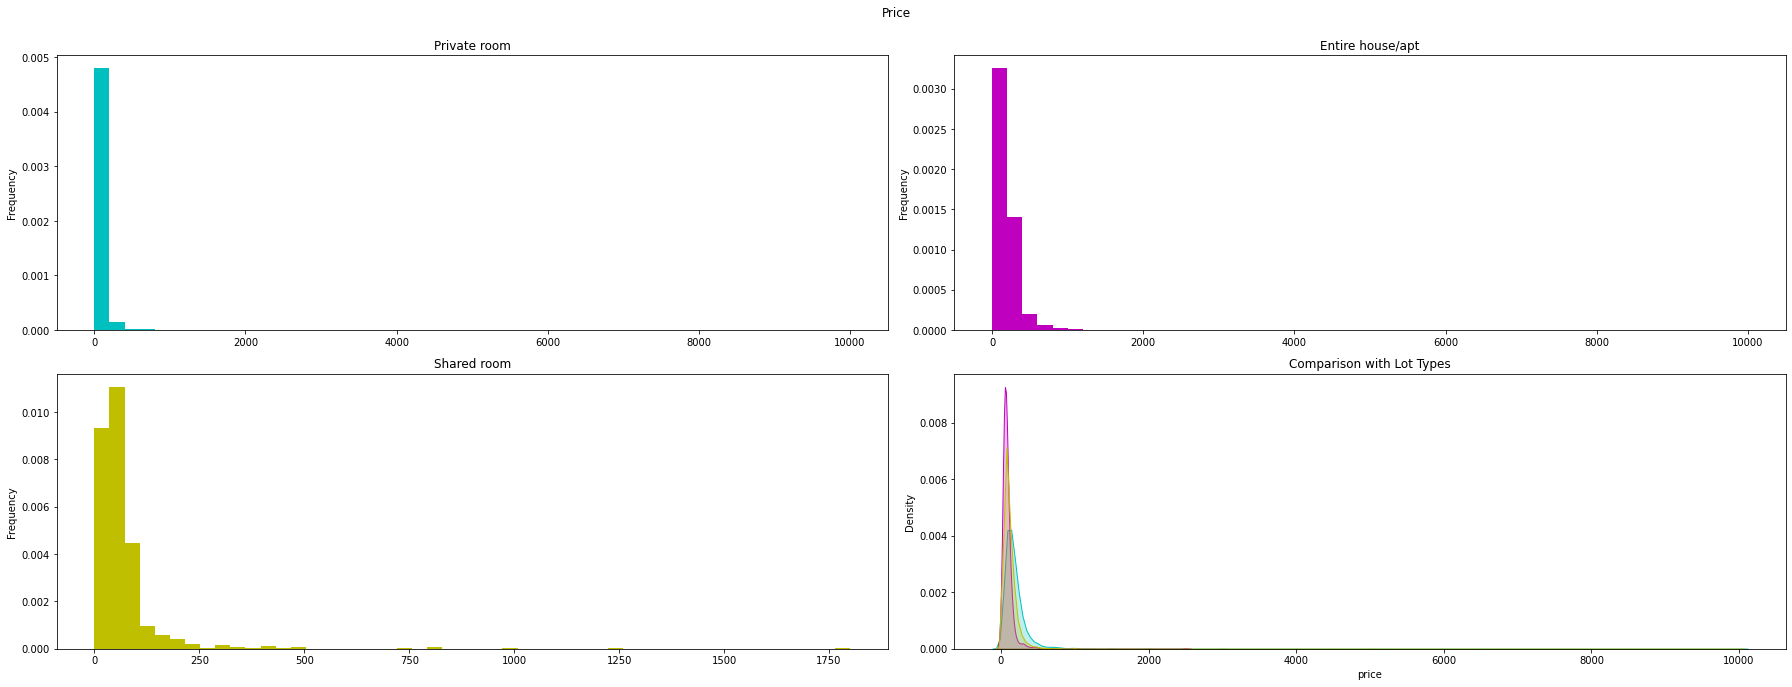

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,10)) 
        
priv['price'].plot(kind="hist", ax=ax[0][0], bins=50, label="Private room", color="c", density=True)
ax[0][0].set_title("Private room")

ent['price'].plot(kind="hist", ax=ax[0][1], bins=50, label="Entire house/apt", color="m", density=True)
ax[0][1].set_title("Entire house/apt")

sha['price'].plot(kind="hist", ax=ax[1][0], bins=50, label="Shared room", color="y", density=True)
ax[1][0].set_title("Shared room")

sns.kdeplot(sample_Manhattan['price'], shade=True, label="Private room", ax=ax[1][1], color="c")
sns.kdeplot(sample_Bronx['price'], shade=True, label="Entire house/apt", ax=ax[1][1], color="m")
sns.kdeplot(sample_Brooklyn['price'], shade=True, label="Shared room", ax=ax[1][1], color="y")

ax[1][1].set_title("Comparison with Lot Types")

plt.suptitle("Price")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
f_stats, p_values = f_oneway(priv['price'].values, ent['price'].values, sha['price'].values)
p_values


0.0

**Interpretation of result:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that avarage prices for all lot types are not the same for all neighborhood groups. **Here, we reject the null hypothesis.**

### Sample Hypothesis Test 3   

**Sample 1:** Houses with subway stations within 5 km range

**Sample 2:** Houses with subway stations outside 5 km range

**Hypothesis Test:** We want to determine whether proximity of subway stations's are directly proportional to the average price of that place.

**Null Hypothesis ($H_0$)**: The average price of sample 1 $(\mu_{1})$ is equal to the average price of sample 2 $(\mu_{2})$.

$ H_0: \mu_{1} = \mu_{2}$

**Alternative Hypothesis ($H_A$)**: The average price of sample 1 $(\mu_{1})$ is not equal to the average price of sample 2 $(\mu_{2})$.

$ H_A: \mu_{1} != \mu_{2}$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. 

In [ ]:
latlist = []
lonlist = []
for i in dataframe4["the_geom"].to_list():
  latlist.append(float(i.split()[2][:-1]))
  lonlist.append(float(i.split()[1][1:])) 

dataframe4["longitude"] = lonlist
dataframe4["latitude"] = latlist
dataframe4.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES,longitude,latitude
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-73.991070,40.730054
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-74.000193,40.718803
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights",-73.983849,40.761728
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times",-73.974999,40.680862
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times",-73.894886,40.664714


In [ ]:
from sklearn.neighbors import BallTree
from math import radians

listing_locs = df[["latitude", "longitude"]].values
subway_locs = dataframe4[["latitude", "longitude"]].values
tree = BallTree(subway_locs, metric="haversine")
nearest_distances, nearest_subway_indices = tree.query(listing_locs)
nearest_distances[0] 

array([0.00469205])

In [ ]:
nearest_distances_km = []
for i in nearest_distances:
  nearest_distances_km.append(i * 6371)
#We multiplied i with 6371 because earth's radius is 6371 km. 

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


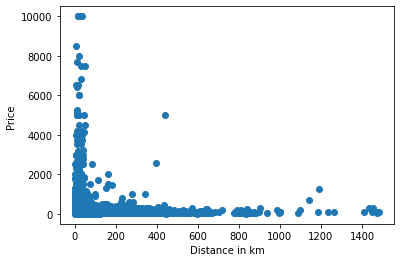

In [ ]:
x = list(df["price"])
y = nearest_distances_km
plt.scatter(y, x)

plt.ylabel("Price ")
plt.xlabel("Distance in km")
plt.show()

<font color = "brown">
<font size = 4px>
Scatter plot which indicates the distribution of the distance of subway stations to lots in terms of price
</font>

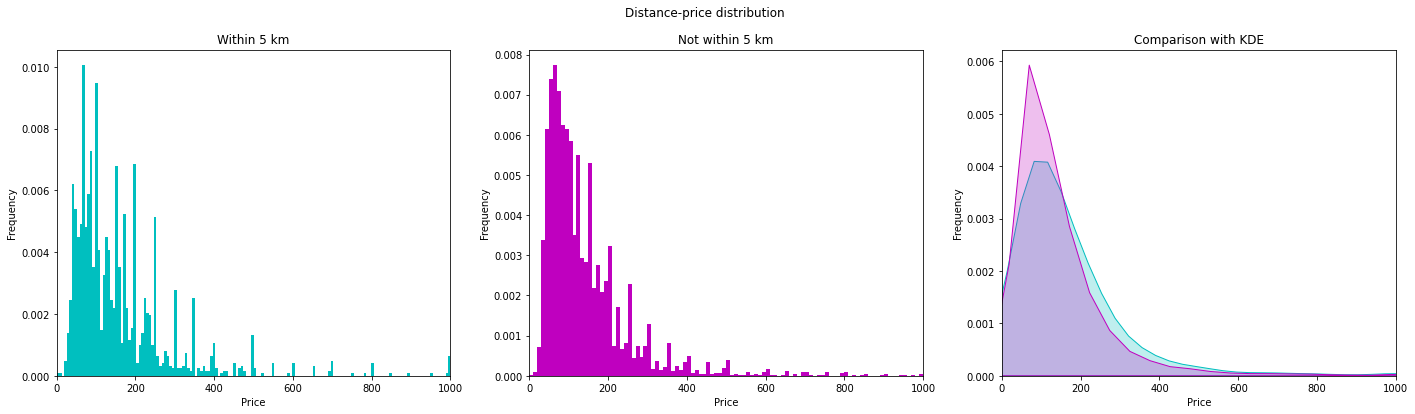

In [ ]:
isLessThan = []
for i in nearest_distances_km:
  if i < 5:
    isLessThan.append(1)
  else:
    isLessThan.append(0)
df["isLessThan5Km"] = isLessThan

test_type = "price"

lessThan = df[df["isLessThan5Km"] == 1][test_type]
greaterThan = df[df["isLessThan5Km"] == 0][test_type]

fig, ax = plt.subplots(1, 3, figsize=(24,6))

lessThan.plot(kind="hist", ax=ax[0], bins=1000, label="lessThan", color="c", density=True)
ax[0].set_title("Within 5 km")
ax[0].set_xlim(0,1000)
ax[0].set(xlabel="Price", ylabel="Frequency")

greaterThan.plot(kind="hist", ax=ax[1], bins=1000, label="greaterThan", color="m", density=True)
ax[1].set_title("Not within 5 km")
ax[1].set_xlim(0,1000)
ax[1].set(xlabel="Price", ylabel="Frequency")

sns.kdeplot(lessThan, shade=True, label="Within 5 km", ax=ax[2], color="c")
sns.kdeplot(greaterThan, shade=True, label="Not within 5 km", ax=ax[2], color="m")

ax[2].set_title("Comparison with KDE")
ax[2].set_xlim(0,1000)
ax[2].set(xlabel="Price", ylabel="Frequency")

plt.suptitle("Distance-price distribution")
plt.show()

**T-test:**



In [ ]:
stats.ttest_ind(lessThan, greaterThan, equal_var=False)

Ttest_indResult(statistic=3.9795311987114657, pvalue=7.146786987428628e-05)

**Interpretation of result:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that proximity of subway stations's are not directly proportional to the average price of that place. **Here, we reject the null hypothesis.**

### Sample Hypothesis Test 4

**Sample 1:** Houses with POI's within 25 km range

**Sample 2:** Houses with POI's outside 25 km range

**Hypothesis Test:** We want to determine whether proximity of POI's are directly proportional to the average price of that place.

**Null Hypothesis ($H_0$)**: The average price of sample 1 $(\mu_{1})$ is equal to the average price of sample 2 $(\mu_{2})$.

$ H_0: \mu_{1} = \mu_{2}$

**Alternative Hypothesis ($H_A$)**: The average price of sample 1 $(\mu_{1})$ is not equal to the average price of sample 2 $(\mu_{2})$.

$ H_A: \mu_{1} != \mu_{2}$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
latlistPOI = []
lonlistPOI = []
for i in dataframe2["the_geom"].to_list():
  latlistPOI.append(float(i.split()[2][:-1]))
  lonlistPOI.append(float(i.split()[1][1:])) 

dataframe2["longitude"] = lonlistPOI
dataframe2["latitude"] = latlistPOI
dataframe2

,the_geom,OBJECTID,Id,Name,Stacked,AnnoLine1,AnnoLine3,Borough,AnnoLine4,AnnoLine2a,Angle,longitude,latitude
0,POINT (-73.88895811640342 40.8962098695574),1,90,Van Cortlandt Park,3,Van,Park,Bronx,NaN,Cortlandt,0,-73.888958,40.896210
1,POINT (-73.87165102682086 40.88987947152594),2,95,Woodlawn Cemetery,2,Woodlawn,NaN,Bronx,NaN,Cemetery,0,-73.871651,40.889879
2,POINT (-73.8386418872537 40.88696522165708),3,81,Seton Falls Park,3,Seton,Park,Bronx,NaN,Falls,0,-73.838642,40.886965
3,POINT (-73.80980242290379 40.87798554992497),4,69,Pelham Bay Park,3,Pelham,Park,Bronx,NaN,Bay,0,-73.809802,40.877986
4,POINT (-73.87830775950145 40.864423947038276),5,8,Botanical Garden,2,Botanical,NaN,Bronx,NaN,Garden,0,-73.878308,40.864424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,POINT (-73.89847195245063 40.76444875872217),102,80,Saint Michael's Cemetery,2,St. Michael's,NaN,Queens,NaN,Cemetery,0,-73.898472,40.764449
92,POINT (-73.91682910729087 40.89230556742364),103,75,Riverdale Park,1,Riverdale Park,NaN,Bronx,NaN,Park,75,-73.916829,40.892306
93,POINT (-73.86271386920103 40.69944758256273),105,31,Forest Park (Golf Course),1,Forest,NaN,Queens,NaN,NaN,0,-73.862714,40.699448
94,POINT (-73.86501941871359 40.64582806586263),108,87,Spring Creek Park Preserve (No Access),2,Spring Creek,NaN,Brooklyn,NaN,Park,0,-73.865019,40.645828


In [ ]:
dataframe2.head()

,the_geom,OBJECTID,Id,Name,Stacked,AnnoLine1,AnnoLine3,Borough,AnnoLine4,AnnoLine2a,Angle,longitude,latitude
0,POINT (-73.88895811640342 40.8962098695574),1,90,Van Cortlandt Park,3,Van,Park,Bronx,NaN,Cortlandt,0,-73.888958,40.896210
1,POINT (-73.87165102682086 40.88987947152594),2,95,Woodlawn Cemetery,2,Woodlawn,NaN,Bronx,NaN,Cemetery,0,-73.871651,40.889879
2,POINT (-73.8386418872537 40.88696522165708),3,81,Seton Falls Park,3,Seton,Park,Bronx,NaN,Falls,0,-73.838642,40.886965
3,POINT (-73.80980242290379 40.87798554992497),4,69,Pelham Bay Park,3,Pelham,Park,Bronx,NaN,Bay,0,-73.809802,40.877986
4,POINT (-73.87830775950145 40.864423947038276),5,8,Botanical Garden,2,Botanical,NaN,Bronx,NaN,Garden,0,-73.878308,40.864424


In [ ]:
from sklearn.neighbors import BallTree
from math import radians

listing_locs = df[["latitude", "longitude"]].values
POI_locs = dataframe2[["latitude", "longitude"]].values

# radians için bir fonksiyon
#r = np.vectorize(lambda x: radians(x))
# lat-lng değerlerini radians'a çevir
#listing_locs = r(listing_locs)
#subway_locs = r(subway_locs)

# ballTree'ye subway listesini gir
# haversine, yeryüzü üzerindeki noktalar arasındaki mesafeler için
treePOI = BallTree(POI_locs, metric="haversine")

# oluşan tree'den listing loc'ları için en yakın noktaları çek
nearest_distancesPOI, nearest_POI_indices = treePOI.query(listing_locs)

#Bunlar distance matrix değil. Her iki variable da (nearest_distances, nearest_subway_indices) listing_locs ile aynı length'e sahip. Aynı index'tekiler de aynı objeler. Örneğin ilk airbnb listing'in nearest distance ve hangi subway durağı olduğunu anlamak için

nearest_distancesPOI[0]  # en yakındaki durağın mesafesi
#subway_locs[nearest_subway_indices[0]] # durağın lat-lng değerleri

#Yani nearest_subway_indices orijinal subway_locs'taki değerlerin index'lerini saklıyor. Bu iki array'i istediğin gibi manipüle edebilirsin.

array([0.01413401])

In [ ]:
nearest_distances_km_POI = []
for i in nearest_distancesPOI:
  nearest_distances_km_POI.append(i * 6371)
#We multiplied i with 6371 because earth's radius is 6371 km. 

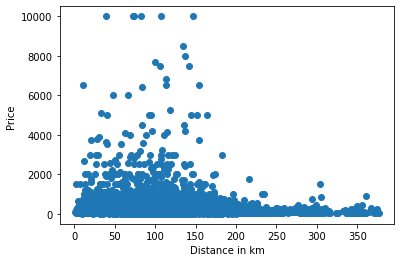

In [ ]:
x = list(df["price"])
y = nearest_distances_km_POI
plt.scatter(y, x)
plt.ylabel("Price ")
plt.xlabel("Distance in km")
plt.show()

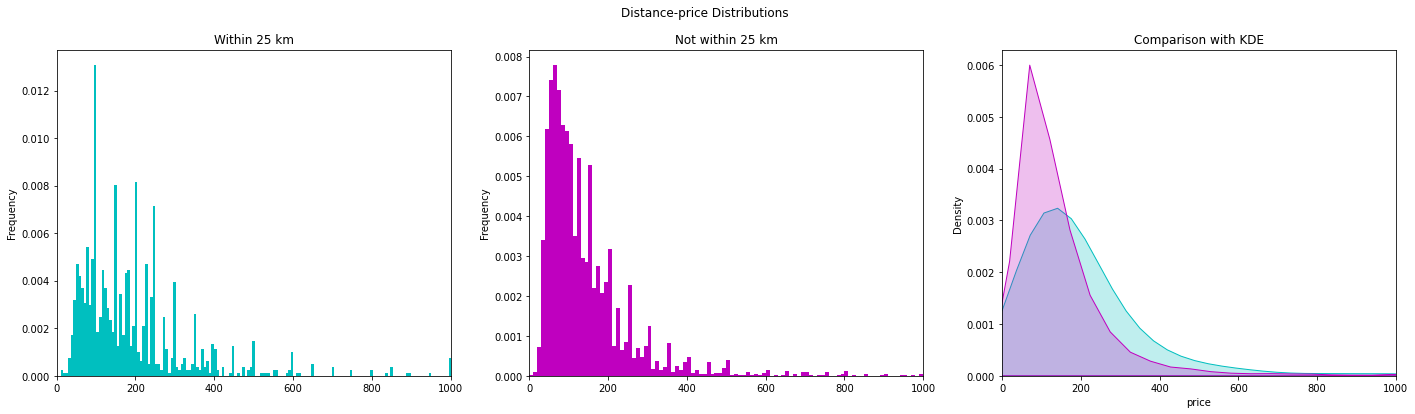

In [ ]:
isLessThanPOI = []
for i in nearest_distances_km_POI:
  if i < 25:
    isLessThanPOI.append(1)
  else:
    isLessThanPOI.append(0)
df["isLessThan10KmPOI"] = isLessThanPOI

test_type = "price"

lessThanPOI = df[df["isLessThan10KmPOI"] == 1][test_type]
greaterThanPOI = df[df["isLessThan10KmPOI"] == 0][test_type]

fig, ax = plt.subplots(1, 3, figsize=(24,6))

lessThanPOI.plot(kind="hist", ax=ax[0], bins=1000, label="Within 25 km", color="c", density=True)
ax[0].set_title("Within 25 km")
ax[0].set_xlim(0,1000)

greaterThanPOI.plot(kind="hist", ax=ax[1], bins=1000, label="Not within 25 km", color="m", density=True)
ax[1].set_title("Not within 25 km")
ax[1].set_xlim(0,1000)

sns.kdeplot(lessThanPOI, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(greaterThanPOI, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")
ax[2].set_xlim(0,1000)

plt.suptitle("Distance-price Distributions")
plt.show()

**T-test:**

In [ ]:
stats.ttest_ind(lessThanPOI, greaterThanPOI, equal_var=False)

Ttest_indResult(statistic=7.72556518193718, pvalue=2.2246026354829505e-14)

**Interpretation of result:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude proximity of POI's are not directly proportional to the average price of that place. **Here, we reject the null hypothesis.**

### Sample Hypothesis Test 5

**Sample 1:** Houses within 5 km from the subway stations.

**Sample 2:** Houses within 5 km from the bus stops.

**Hypothesis Test:** We aimed to compare the average prices of houses with a bus stop within 5 km and a metro stop within 5 km.

**Null Hypothesis ($H_0$)**: The average price of sample 1 $(\mu_{1})$ is equal to the average price of sample 2 $(\mu_{2})$.

$ H_0: \mu_{1} = \mu_{2}$

**Alternative Hypothesis ($H_A$)**: The average price of sample 1 $(\mu_{1})$ is not equal to the average price of sample 2 $(\mu_{2})$.

$ H_A: \mu_{1} != \mu_{2}$

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too. 

In [ ]:
dataframe3.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [ ]:
from sklearn.neighbors import BallTree
from math import radians

listing_locs = df[["latitude", "longitude"]].values
bus_locs = dataframe3[["LATITUDE", "LONGITUDE"]].values

# radians için bir fonksiyon
#r = np.vectorize(lambda x: radians(x))
# lat-lng değerlerini radians'a çevir
#listing_locs = r(listing_locs)
#subway_locs = r(subway_locs)

# ballTree'ye subway listesini gir
# haversine, yeryüzü üzerindeki noktalar arasındaki mesafeler için
treeBus = BallTree(bus_locs, metric="haversine")

# oluşan tree'den listing loc'ları için en yakın noktaları çek
nearest_distancesBus, nearest_bus_indices = treeBus.query(listing_locs)

#Bunlar distance matrix değil. Her iki variable da (nearest_distances, nearest_subway_indices) listing_locs ile aynı length'e sahip. Aynı index'tekiler de aynı objeler. Örneğin ilk airbnb listing'in nearest distance ve hangi subway durağı olduğunu anlamak için

nearest_distancesBus[0]  # en yakındaki durağın mesafesi
#subway_locs[nearest_subway_indices[0]] # durağın lat-lng değerleri

#Yani nearest_subway_indices orijinal subway_locs'taki değerlerin index'lerini saklıyor. Bu iki array'i istediğin gibi manipüle edebilirsin.

array([0.00173175])

In [ ]:
nearest_distances_Bus_km = []
for i in nearest_distancesBus:
  nearest_distances_Bus_km.append(i * 6371)
#We multiplied i with 6371 because earth's radius is 6371 km. 

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,isLessThan5Km,isLessThan10KmPOI
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0


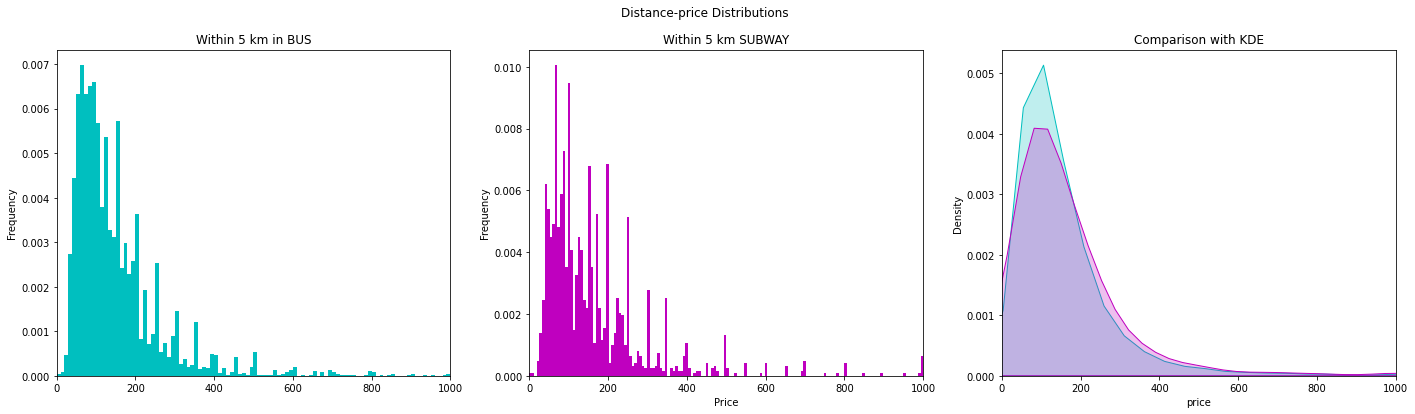

In [ ]:
isLessThanBus = []
for i in nearest_distances_Bus_km:
  if i <5:
    isLessThanBus.append(1)
  else:  
    isLessThanBus.append(0)

df["isLessThan5KmBus"] = isLessThanBus

test_type = "price"

lessThanBus = df[df["isLessThan5KmBus"] == 1][test_type]
lessThan = df[df["isLessThan5Km"] == 1][test_type]

fig, ax = plt.subplots(1, 3, figsize=(24,6))

lessThanBus.plot(kind="hist", ax=ax[0], bins=1000, label="Within 5 km in Bus stops", color="c", density=True)
ax[0].set_title("Within 5 km in BUS")
ax[0].set_xlim(0,1000)

lessThan.plot(kind="hist", ax=ax[1], bins=1000, label="lessThan", color="m", density=True)
ax[1].set_title("Within 5 km SUBWAY")
ax[1].set_xlim(0,1000)
ax[1].set(xlabel="Price", ylabel="Frequency")

sns.kdeplot(lessThanBus, shade=True, label="completed students", ax=ax[2], color="c")
sns.kdeplot(lessThan, shade=True, label="none students", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")
ax[2].set_xlim(0,1000)

plt.suptitle("Distance-price Distributions")
plt.show()

In [ ]:
stats.ttest_ind(lessThanBus, lessThan, equal_var=False)

Ttest_indResult(statistic=-2.817272524227512, pvalue=0.004880683007069745)

**Interpretation of result:**

> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude proximity of POI's are not directly proportional to the average price of that place. **Here, we reject the null hypothesis.**

**IMPORTANT NOTE:** This must be noted that p-value is extremely close to the significance level 0.05. 

---
# Machine Learning
---

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os.path import join
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


### Reggression Model -1: Lineer Regression


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,isLessThan5Km,isLessThan10KmPOI,isLessThan5KmBus
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,0,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0,0,0


In [ ]:
df.dropna(subset = ["reviews_per_month"], inplace=True)
df.head()



>By doing so, we excluded the NaN values in the reviews per month column.

In [ ]:
dfcopy = df
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_input = encoder.fit_transform(np.array(list(dfcopy["room_type"])).reshape(-1,1))
dfcopy["room_type"] = encoded_input
encoded_input

encoded_input_2 = encoder.fit_transform(np.array(list(dfcopy["neighbourhood_group"])).reshape(-1,1))
dfcopy["neighbourhood_group"] = encoded_input_2
encoded_input_2

array([[1.],
       [2.],
       [1.],
       ...,
       [4.],
       [0.],
       [1.]])



>In our main data, room type and neighbourhood group columns do not fit into the machine learning crtierias due to its non-numerical nature. So, we encoded to put these non-numerical values into numbers such as 1,2,3 etc.

Additionaly, we included room type and neighbourhood group in order to decrease the mean absolute error. Before we include these features mean absolute error was 85. After inclusion, it becomes nearly 65. 

In [ ]:
features = ["neighbourhood_group","room_type","number_of_reviews","minimum_nights","availability_365","reviews_per_month","calculated_host_listings_count","isLessThan5Km", "isLessThan10KmPOI", "isLessThan5KmBus"]
X = dfcopy[features].values  # converting to column vector
target = dfcopy['price'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=0)

Here important note: We have add 3 features from different data sets namely isLessThan5Km, isLessThan10KmPOI, isLessThan5KmBus

In [ ]:
# creating the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's have a look at the coefficients, 
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df

,Coefficient
neighbourhood_group,8.051466
room_type,-102.035149
number_of_reviews,-0.176200
minimum_nights,-0.127722
availability_365,0.148321
reviews_per_month,-1.899133
calculated_host_listings_count,0.076218
isLessThan5Km,13.242390
isLessThan10KmPOI,38.278052
isLessThan5KmBus,4.721017




>We found coefficients individually.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))
print(r2_score(y_test, y_pred))

mse: 31599.449133010436
mae: 65.74335374195446
rmse: 177.76233890509664
0.11581944339529404


**Interpretation of result:**

>We conclude that the analyized features do not correlate strongly with the price. Therefore, the high mean absolute error can be explanid with this argument. 

>The r^2 value is close to 0.11 which demonstrates that they are weakly correlated in positive direction.



### Reggression Model - 2: Decision Tree


In [ ]:

from sklearn.tree import DecisionTreeRegressor

In [ ]:
x_ml = dfcopy[["neighbourhood_group","room_type","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365","isLessThan5Km", "isLessThan10KmPOI", "isLessThan5KmBus"]]
y_ml = dfcopy[["price"]]
x_train_ml, x_test_ml, y_train_ml, y_test_ml = train_test_split(x_ml, y_ml, test_size = 0.1, random_state = 42)

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train_ml, y_train_ml)
y_predict_tree_model = tree_model.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_tree_model)

-0.7137200717374137

In [ ]:
mean_absolute_error(y_test_ml["price"], y_predict_tree_model)

81.63912896108262

**Interpretation of result:**

>In contrast to lineer regression above, we found that the analyzed features  correlates strongly with the price in negative direciton. However, the mean absolute error is higher than the lineer regression model's. 




### Regularization Methods for Regression Models - 1: RIDGE


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridgeRegression = Ridge(alpha = 0.001)
ridgeRegression.fit(x_train_ml, y_train_ml)
y_predict_ridge_model = ridgeRegression.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_ridge_model)
#mean_absolute_error(y_test_ml["price"], y_predict_ridge_model)

0.1211071822140044

In [ ]:
ridgeRegression = Ridge(alpha = 10000)
ridgeRegression.fit(x_train_ml, y_train_ml)
y_predict_ridge_model = ridgeRegression.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_ridge_model)
#mean_absolute_error(y_test_ml["price"], y_predict_ridge_model)

0.08716261179148943

**Interpretation of result:**

>Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression. 

The regularization model Ridge suggest that higher the alpha value, more restriction on the coefficients; low alpha means more generalization. 

When the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (10000), the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.




### Regularization Methods for Regression Models - 2: LASSO


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lassoRegression = Lasso(alpha = 100)
lassoRegression.fit(x_train_ml, y_train_ml)
y_predict_lasso_model = lassoRegression.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_lasso_model)
#print(mean_absolute_error(y_test_ml["price"], y_predict_lasso_model))

0.004940554553287013

In [ ]:
lassoRegression = Lasso(alpha = 0.001)
lassoRegression.fit(x_train_ml, y_train_ml)
y_predict_lasso_model = lassoRegression.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_lasso_model)
#print(mean_absolute_error(y_test_ml["price"], y_predict_lasso_model))

0.12110546311393766

**Interpretation of result:**

>Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

When we increase alpha value, r2 scores approximates to the negative value.




### Random Forest Model -  Scaling/Normalization and Hyper-parameter Tuning


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train_ml, y_train_ml["price"])
y_predict_rf_regressor = rf_regressor.predict(x_test_ml)
r2_score(y_test_ml["price"], y_predict_rf_regressor)

mean_absolute_error(y_test_ml["price"], y_predict_rf_regressor)

63.74279851550768

In [ ]:
train_set_accuracies = []
val_set_accuracies = []
errors = []

for depth in range(50):
  model = DecisionTreeRegressor(max_depth = depth + 1)
  model.fit(x_train_ml, y_train_ml)
  train_preds = model.predict(x_train_ml)
  val_preds = model.predict(x_test_ml)
  train_set_accuracies.append(r2_score(y_train_ml, train_preds))
  val_set_accuracies.append(r2_score(y_test_ml, val_preds))
  errors.append(mean_absolute_error(y_test_ml, val_preds))

In [ ]:
errors

We built Random Forest model with varying values for the max_depth hyper-parameter. As the name of it also suggests, this parameter controls the maximum depth that the Random Forest can grow.

# Conclusion

To sum up everything that has been stated so far, We started to analyze our main data by comparing different neighbourhood groups in terms of lot prices. After that we investigate whether any features from our datasets would have an effect on the price. After that we stated 5 hypothesis regarding the features such as number of reviews, lot types, transportation availabilities, POI and etc. Finally, we put those different features into the various machine learning techniques. As it is seen above, we can only predict price with the +-65$ price change. These mean absolute errors show that our predictions are not as good as we expected. This might be caused by the weak correlation between our features and price.